## Project 4 — Microbial Growth and Environmental Response Dashboard
Description

This project studies microbial growth patterns between two sample environments — groups A (e.g., control) and B (e.g., treated).
It computes mean abundance per group, calculates the growth ratio (B/A), classifies taxa as Fast- or Slow-Growing, and identifies microbes most responsive to environmental change.
Results are summarized and visualized through scatter plots and categorical analysis.

✅ Saved microbial_growth_response.csv


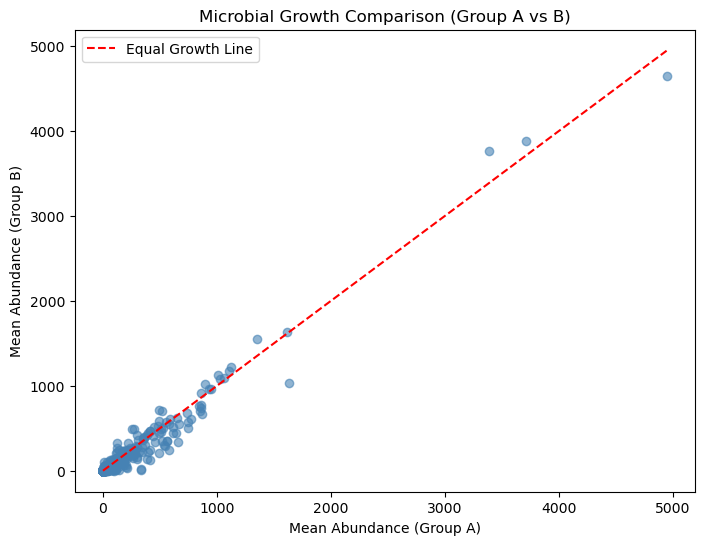

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("Micro_Data.csv")

# Separate A and B columns
a_cols = [col for col in df.columns if col.startswith("A")]
b_cols = [col for col in df.columns if col.startswith("B")]

df["Mean_A"] = df[a_cols].mean(axis=1)
df["Mean_B"] = df[b_cols].mean(axis=1)

# Compute growth ratio (B/A)
df["Growth_Ratio"] = np.where(df["Mean_A"] > 0, df["Mean_B"] / df["Mean_A"], np.nan)

# Classify growth response
df["Growth_Response"] = [
    "Fast-Growing" if r > 1 else "Slow-Growing"
    for r in df["Growth_Ratio"]
]

# Save output
df.to_csv("microbial_growth_response.csv", index=False)
print("✅ Saved microbial_growth_response.csv")

# Plot A vs B comparison
plt.figure(figsize=(8,6))
plt.scatter(df["Mean_A"], df["Mean_B"], alpha=0.6, color="steelblue")
plt.plot([0, df["Mean_A"].max()], [0, df["Mean_A"].max()], 'r--', label="Equal Growth Line")
plt.title("Microbial Growth Comparison (Group A vs B)")
plt.xlabel("Mean Abundance (Group A)")
plt.ylabel("Mean Abundance (Group B)")
plt.legend()
plt.show()
